# **XSPL Research Experience for High school students (REH)** 

### written by Jackie Champagne (UT Austin), adapted by Hannah Hasson (U of Rochester)  
&nbsp;  
# Introduction to Python Day 3:
# Interpolation & Fitting Data

Welcome back again! So far we have covered basic syntax, arrays, if statements, for loops, functions, and plotting. Now we can start building some data analysis skills using statistics. 

&nbsp;

Today we will start by learning about reading in data files. But of course, let's import numpy and matplotlib first :)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp;

#**Loading in files**

Up until now, none of the exercises have required you to load in an outside file to the notebook, but this is definitely a skill you'll need! So let's learn how to work with files in python.

&nbsp;

We will start with learning how to import a file into Colab. You will have to upload the file before you use it in a notebook. This is not needed if you are running python offline, but since Colab doesn't save your files, you'll have to feed it the file whenever you re-open the notebook. We can talk about more permanent ways to do this later, but for now, here's what to do:

1. Click on the picture of the folder on the lefthand sidebar. You should now be in the "Files" menu.
2. Click the picture of the paper with an up arrow, and then select the file from your computer. For this lesson, I have uploaded a sample gaussian data file "spectrum.csv" to the drive for you to download to your computer. Upload that file here now.

&nbsp;

Now that we have our file uploaded to Colab, let's load it into python. We will use [numpy.genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html?highlight=genfromtxt#numpy.genfromtxt) to read in our CSV file. Wait-- what is a CSV? It stands for **Comma-Separated Value**. So it's just a file with data separated by commas! If you open the CSV file on your computer, that is exactly what you will see: numbers separated by commas.

&nbsp;

Here's how you import CSV files with np.genfromtxt:

    np.genfromtxt(filename, delimiter=",")


The "**delimiter**" is the character that separates each datapoint, which here is a comma. You can use pretty much anything as a delimiter, but commas are pretty typical. In fact, you can export data in Excel as a CSV.

&nbsp;

Let's load our file in. We have two columns of data, one for wavelength and the other for the signal intensity, so let's read those in separately. Since python reads in data by row, and our file has the data in two columns, we will **transpose** our array so that it's two rows. Then we can assign each row of data to a variable: 

In [4]:
#Load in data in original format
data_columns = np.genfromtxt("spectrum.csv", delimiter = ",")
print(data_columns.shape)

#Take the transpose so we have two rows of data
data_rows = data_columns.T
print(data_rows.shape)

#Assign each row to a variable
wavelength, signal = data_rows

(211, 2)
(2, 211)


To unpack what just happened a bit:

1. We loaded in our file as an array to the variable "data_columns." This file has 211 rows and 2 columns (one for wavelength, one for light intensity).
2. We [transposed](https://https://mathinsight.org/matrix_transpose) the data using ".T", which flips along the diagonal. Now we see we have 2 rows and 211 columns.
3. We assigned the first row of data to the variable "wavelength," and the second to "signal." This double-assignment is a trick you can do if you know how many rows of data you have.

We can plot this data and see what it looks like:

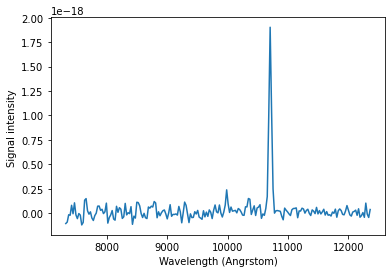

In [5]:
plt.plot(wavelength, signal)
plt.xlabel("Wavelength (Angrstom)")
plt.ylabel("Signal intensity ")
plt.show()

This data actually shows light of a specific color that was emitted from some hot plasma out in space! We call this a **spectral line**. 


We want to learn about the properties of this line, but how? Well, scientists like to fit their data to mathematical **models** (equations) that explain what is happening.

For the case of spectral lines, we typically use what's called a Gaussian model.


##**A bit of math: What is a Gaussian?**

A Gaussian (a.k.a. "bell curve") is one of the most common curves you will see in physics. The Gaussian looks like a single smooth peak, and shows up in statistical physics quite a bit. For example, emission lines in stars and other plasmas generally take this shape. A Gaussian curve looks like this:

![](https://drive.google.com/uc?export=view&id=1DO9ehzwfXJOC6dtjdT-_PtMi_PUwJkRV)

The function is:

## $f(x)=a\cdot e^\frac{-(x-\mu)^2}{2\sigma^2}$

The center of the curve is at position $\mu$, and the curve has width 2$\sigma$ and maximum height $a$. 

Note that here $e$ is Euler's number ($e\sim 2.7$.) The python function for $e$ raised to some power is np.exp(some_power).

&nbsp;

### Question 1: Let's use our skills from last time for defining our own functions and make a "Gaussian" function with inputs x, mu, sigma, and a that has the form of the function above:

In [8]:
def gaussian(x,mu,sigma,a):
  answer = a*np.exp(-(x-mu)**2/(2*sigma**2))
  return answer

# Be careful with your parentheses!

###Question 2: Use np.linspace to make an array of 50 datapoints from 0 to 100 called "xvals". Then feed this array into your gaussian function in place of the "x" input. Pick whatever numbers you want for a, mu, and sigma.

In [16]:
#solution here

xvals = np.linspace(0,100,50)

yvals = gaussian(xvals,50,20,15)

###Question 3: Plot this bad boy using plt.plot().

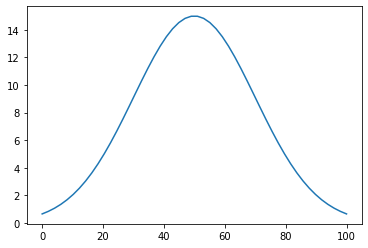

In [17]:
#solution here

plt.plot(xvals, yvals)

Take a second to look at the width, height, and mean value of your plot and compare it to your inputs.


&nbsp; 
&nbsp; 
-------
#PAUSE HERE AND TAKE A BREAK!
-------

&nbsp;

## **Fitting a function to data**

Let's now learn about fitting a function to data! 

In research, you typically have some **data** you've collected, and then a **model** (a.k.a. some mathematical function) that you think the data should follow. There is always noise in the data because no instrument is perfect, so the model won't perfectly predict the data. As scientists, we can use a technique called [**least-squares**](https://mathworld.wolfram.com/LeastSquaresFitting.html) to minimize the difference between the plot of the model and the real data points. This will make more sense once you see it visually.

&nbsp;


Let's start with the simplest example of fitting a curve to some data. We can define a function for a line just as we did last time:

In [19]:
def line(x, m, b):
  y = m*x +b
  return y

&nbsp;

Let's come up with some random noisy data that we could fit a line to. I'm going to use the [np.random](https://numpy.org/doc/1.16/reference/routines.random.html) subpackage to add some noise of a certain scale to the data in order to make it not be a perfect line. I'm going to arbitrarily choose that the true line (without noise) will have a slope of 2 and an intercept of 5.

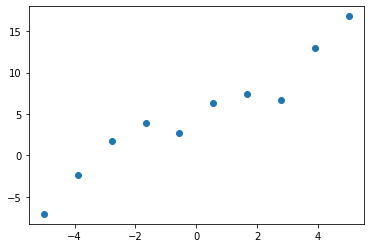

In [20]:
xvals = np.linspace(-5,5,10)

#generate random noise
rng = np.random.RandomState(108) #seed random generator so it's reproducible
noise = rng.normal(0,2,10) #extra signal generally between -2 and 2

#generate pure and noisy data
ynoise = 2*xvals + 5 + noise 

plt.plot(xvals, ynoise,"o") 
plt.show()

We can see how adding the noise impacted the data, since it is definitely not a straight line. In real experiments you will always have noise, so your data will never perfectly fit the model. 

&nbsp;

Pretending that we don't already know what the inputs of this data are, let's try fitting a straight line to it. We will now go through to do this with opt.curve_fit. First we import the **optimize** subpackage from scipy. Let's import it as "opt." 

In [21]:
#Import the optimize function
from scipy import optimize as opt


Optimize is a subpackage of scipy with lots of nice functions for minimizing and maximizing mathematical functions. We will be using the [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.htmlhttps://) function, which tries to find what values of the model's inputs that will minimize the difference between the function and your data.

&nbsp;

Here is how we call the **opt.curve_fit** function:

    bfpars, covar = opt.curve_fit(function, xdata, ydata, p0=initial_guess)

&nbsp;

This function returns the **best fit parameters** (bfpars) for your function variables, as well as something called the "covariance matrix" (covar, which we don't need to worry about). 

&nbsp;

The last input, **p0, is the initial guess** of the function's variables - this is important because a bad first guess (or lack of a first guess) of the function inputs will cause a bad fit. If you are trying to fit multiple variables in your function, you will need to provide one guess for each variable, fed to the optimizer as a list. 





*NOTE: The order of the guesses in p0 has to be the same as the order of the inputs in the function!*

In [22]:
bfpars, covar =  opt.curve_fit(line, xvals, ynoise, p0=[1, 3]) #guessing m=1, b=3

print(bfpars)

[1.96615035 4.9124747 ]


"Bfpars" is now an array containing the best fit parameters, in the same order as your function. So in my case, bfpars[0] is $m$ and bfpars[1] is $b$.

This is telling us that the closest fit of a line to the data gives m=1.97 and b=4.91. This is reasonably close to the true values of m=2, b=5! 



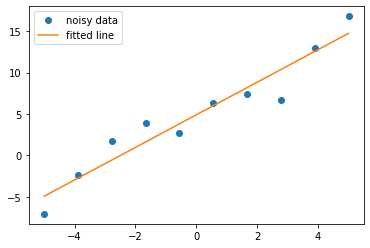

In [23]:
yfit = xvals*bfpars[0] + bfpars[1]

plt.plot(xvals, ynoise,"o", label="noisy data") #the blue dots
plt.plot(xvals, yfit, label="fitted line") #orange line
plt.legend()
plt.show()

&nbsp;

Let's now try fitting our Gaussian function to the spectral data we loaded in.

###Question 4: Apply the curve_fit function to the function "gaussian" with the data "wavelength" and "signal," and the initial guesses mu=1e4, sigma=100, a=2e-10. Print the bfpars that come out.

In [26]:
bfpars, covar =  opt.curve_fit(gaussian,wavelength,signal, p0=[1e4,100,2e-10]) #edit this

#print the results
print(bfpars)

[9.98386556e+03 1.71939170e+01 2.38297143e-19]


&nbsp;

## Interpolating Data

You may encounter a situation in research where you will need to **interpolate** a model to interpret your data. This means **finding values in between where you actually have data points**. The scipy library has many different interpolating (and extrapolating) algorithms, but the simplest is a 1D interpolation, called interp1d. 

&nbsp;

Let's first generate a well-behaved function that will be easy to interpolate along. We will use sin(x) for this example and give it a bunch of spaced-out x values.

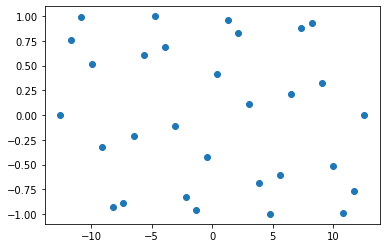

In [27]:
xarray = np.linspace(-4*np.pi, 4*np.pi, 30)
yarray = np.sin(xarray)

plt.plot(xarray, yarray, 'o')
plt.show()

What do you notice about this plot? Well, at first glance it doesn't really look like a sine curve because it is **poorly sampled**, meaning we plotted too few points to see the shape clearly. Of course, since we already know it's a sine curve, we could just sample the function better with more x-values, but what if you didn't know what function fit your data? [Interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) comes to the rescue! 

In [28]:
from scipy.interpolate import interp1d

&nbsp;

Here is the general form for the interp1d function:

    interp1d(xpoints, ypoints, kind="linear")

Of course xpoints and ypoints are the data to interpolate over, but what is "kind?" This is the technique used for guessing the values between the known data points. **Linear interpolation** is the default, which just follows a straight line between all the old points to find new points. There are many techniques that the interp1d function can use to find the new points, but here we will stick with this default. Since it is the default, we can just leave out "kind."

&nbsp;

There are a few steps to interpolation. 

1.   First, feed the interp1d function your original x- and y-values. It will solve between the points and output a **function**
2.   Make a new array of x points with min/max inside the original x-array, but containing more points 
3.   Feed the new x points into the function you made to get new y points

 &nbsp;

For our example, we'll take the same range of x-values, but take more sample points.

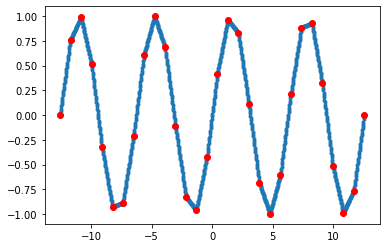

In [29]:
interp = interp1d(xarray, yarray)
xnew = np.linspace(-4*np.pi, 4*np.pi, 1000)
ynew = interp(xnew)

plt.plot(xnew, ynew, '.') #new interpolated points
plt.plot(xarray, yarray, 'or')#old points
plt.show()

Now it looks much closer to a sine curve! 

###Question 5: Try interpolating between these new values with the same technique as above. Add the new upsampled points to the plot.

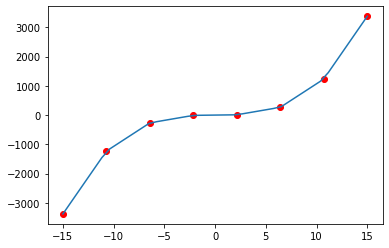

In [30]:
xpoints = np.linspace(-15, 15, 8)
ypoints = xpoints**3

#interpolation here
interp = interp1d(xpoints, ypoints)
xnew = np.linspace(-15,15,40)
ynew = interp(xnew)

plt.plot(xpoints, ypoints, "or") #the undersampled data
plt.plot(xnew, ynew)
plt.show()

&nbsp;

Congrats, you've done your first bit of science with Python!


###Don't forget to do your final set of exercises in the Exercises.ipynb file. Work with your classmates and send me the exercises when you're all done :)